# TTC Headway Analysis (WIP)
Mohamed Osman - 8 Oct 2019

The 'headway' is the length of time between the arrival times of two consecutive trains at a given station. Using historical TTC arrival data (Bloor-Danforth Eastbound, July 2019), we can calculate that metric for each train arrival and perform some analyses with it.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 50)
plt.rcParams["figure.figsize"] = (20,10)

## Read in data

In [14]:
polls = pd.read_csv('polls.csv');
requests = pd.read_csv('requests.csv');
responses = pd.read_csv('responses.csv');

## Create initial dataset

In [15]:
# merge responses with request dates
ttc_init = pd.merge(responses,requests[['requestid','request_date']],on='requestid')

# only want to look at eastbound (xxx1) Bloor-Danforth lines
ttc_init = ttc_init.loc[ttc_init['station_char'].str.endswith('1')].loc[ttc_init['subwayline'] == 'BD']

# sort data by estimated time, station, and request date (ascending)
ttc_init = ttc_init.sort_values(by=['station_char','request_date','timint'])

ttc_init

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,request_date
407654,79943,31832079678,BAT1,BD,Normal,18.427701,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:00:11.601106-04:00
407534,79888,31832080110,BAT1,BD,Normal,18.427701,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:00:19.975394-04:00
407404,79826,31832082918,BAT1,BD,Normal,17.096017,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:01:27.011421-04:00
407270,79767,31832085679,BAT1,BD,Normal,16.334302,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:02:19.891991-04:00
407126,79705,31832091508,BAT1,BD,Normal,15.328311,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:03:27.539640-04:00
406952,79643,31832095330,BAT1,BD,Normal,14.329396,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:04:19.970935-04:00
406770,79579,31832103238,BAT1,BD,Normal,13.349104,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:05:27.742897-04:00
406576,79514,31832109352,BAT1,BD,Normal,11.910410,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:06:28.467196-04:00
406379,79449,31832114723,BAT1,BD,Normal,11.225104,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:07:08.844505-04:00
406154,79381,31832123505,BAT1,BD,Normal,10.314667,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:08:09.132318-04:00


In [16]:
ttc_init.loc[ttc_init['station_char'] == 'YNG1']

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,request_date
333766,63651,31836754493,YNG1,BD,Normal,8.082921,East,215,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:15.103649-04:00
333767,63651,31836754494,YNG1,BD,Normal,13.796398,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:15.103649-04:00
333768,63651,31836754495,YNG1,BD,Normal,18.066126,East,217,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:15.103649-04:00
334209,63740,31836763436,YNG1,BD,Normal,2.802583,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.757305-04:00
334210,63740,31836763437,YNG1,BD,Normal,8.082921,East,215,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.757305-04:00
334211,63740,31836763438,YNG1,BD,Normal,13.238529,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.757305-04:00
333919,63683,31836763436,YNG1,BD,Normal,2.802583,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.826943-04:00
333920,63683,31836763437,YNG1,BD,Normal,8.082921,East,215,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.826943-04:00
333921,63683,31836763438,YNG1,BD,Normal,13.238529,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:45.826943-04:00
333448,63583,31836768230,YNG1,BD,Normal,2.802583,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 12:00:58.033997-04:00


## Transform dataset

In [17]:
# one request => arrival times for multiple trains for one station in a given moment
# since we only care about the first train arriving at a station per moment,
# for each request batch, only keep the one with the earliest estimated time
# since estimated time is already sorted, simply drop subsequent duplicates
ttc_1 = ttc_init.copy().drop_duplicates(subset='requestid')

ttc_1

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,request_date
407654,79943,31832079678,BAT1,BD,Normal,18.427701,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:00:11.601106-04:00
407534,79888,31832080110,BAT1,BD,Normal,18.427701,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:00:19.975394-04:00
407404,79826,31832082918,BAT1,BD,Normal,17.096017,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:01:27.011421-04:00
407270,79767,31832085679,BAT1,BD,Normal,16.334302,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:02:19.891991-04:00
407126,79705,31832091508,BAT1,BD,Normal,15.328311,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:03:27.539640-04:00
406952,79643,31832095330,BAT1,BD,Normal,14.329396,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:04:19.970935-04:00
406770,79579,31832103238,BAT1,BD,Normal,13.349104,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:05:27.742897-04:00
406576,79514,31832109352,BAT1,BD,Normal,11.910410,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:06:28.467196-04:00
406379,79449,31832114723,BAT1,BD,Normal,11.225104,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:07:08.844505-04:00
406154,79381,31832123505,BAT1,BD,Normal,10.314667,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:08:09.132318-04:00


In [18]:
# the sorted dataset now tells us about the arrival times of the approaching train to a station
# to calculate headway, we only need the first and last times of an approaching train
first_last_vals = (ttc_1.trainid.shift(-1,fill_value = -1) == ttc_1.trainid) != (ttc_1.trainid.shift(1,fill_value = -1) == ttc_1.trainid)
ttc_2 = ttc_1.copy().loc[first_last_vals == True]

ttc_2

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,request_date
407654,79943,31832079678,BAT1,BD,Normal,18.427701,East,212,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:00:11.601106-04:00
402659,78508,31832298213,BAT1,BD,Normal,0.000000,East,212,AtStation,Eastbound</br> To Kennedy,2019-07-07 08:21:14.916116-04:00
402360,78440,31832316872,BAT1,BD,Normal,5.767546,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:22:16.044547-04:00
400337,77964,31832449352,BAT1,BD,Normal,0.728406,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:29:19.088136-04:00
400043,77896,31832469419,BAT1,BD,Normal,3.211681,East,215,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:30:24.870395-04:00
398579,77559,31832562675,BAT1,BD,Normal,0.000000,East,215,AtStation,Eastbound</br> To Kennedy,2019-07-07 08:35:18.582477-04:00
398278,77491,31832583094,BAT1,BD,Normal,3.466681,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:36:21.583057-04:00
397072,77219,31832664017,BAT1,BD,Normal,0.283096,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:40:17.357270-04:00
396765,77151,31832684090,BAT1,BD,Normal,2.810251,East,217,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:41:19.888530-04:00
395555,76880,31832765373,BAT1,BD,Normal,0.283096,East,217,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:45:19.256908-04:00


In [19]:
# now we want to calculate headway using the first/last arrival times
# but first, get rid of first arrival times from dataset
# and append first request times to last arrival time rows
# also chop off the first row (headway will be 0)

ttc_3 = ttc_2.copy()
ttc_3['rd2'] = ttc_2.request_date.shift(1,fill_value = ttc_2.iloc[0]['request_date'])
ttc_3['tid2'] = ttc_2.trainid.shift(1,fill_value = ttc_2.iloc[0]['trainid'])

ttc_4 = ttc_3[1:].copy().loc[ttc_3['trainid'] == ttc_3['tid2']]

ttc_4

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,request_date,rd2,tid2
402659,78508,31832298213,BAT1,BD,Normal,0.000000,East,212,AtStation,Eastbound</br> To Kennedy,2019-07-07 08:21:14.916116-04:00,2019-07-07 08:00:11.601106-04:00,212
400337,77964,31832449352,BAT1,BD,Normal,0.728406,East,214,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:29:19.088136-04:00,2019-07-07 08:22:16.044547-04:00,214
398579,77559,31832562675,BAT1,BD,Normal,0.000000,East,215,AtStation,Eastbound</br> To Kennedy,2019-07-07 08:35:18.582477-04:00,2019-07-07 08:30:24.870395-04:00,215
397072,77219,31832664017,BAT1,BD,Normal,0.283096,East,216,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:40:17.357270-04:00,2019-07-07 08:36:21.583057-04:00,216
395555,76880,31832765373,BAT1,BD,Normal,0.283096,East,217,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:45:19.256908-04:00,2019-07-07 08:41:19.888530-04:00,217
394337,76609,31832850578,BAT1,BD,Normal,0.283096,East,218,Arriving,Eastbound</br> To Kennedy,2019-07-07 08:49:22.916332-04:00,2019-07-07 08:46:20.617147-04:00,218
392753,76269,31832950581,BAT1,BD,Normal,0.000000,East,219,AtStation,Eastbound</br> To Kennedy,2019-07-07 08:54:17.762487-04:00,2019-07-07 08:50:19.896902-04:00,219
390204,75727,31833115746,BAT1,BD,Normal,0.000000,East,220,AtStation,Eastbound</br> To Kennedy,2019-07-07 09:02:24.898008-04:00,2019-07-07 08:55:39.411160-04:00,220
388989,75459,31833197512,BAT1,BD,Normal,0.728406,East,221,Arriving,Eastbound</br> To Kennedy,2019-07-07 09:06:23.191322-04:00,2019-07-07 09:03:30.045215-04:00,221
386804,74984,31833336398,BAT1,BD,Normal,0.000000,East,222,AtStation,Eastbound</br> To Kennedy,2019-07-07 09:13:21.900450-04:00,2019-07-07 09:07:26.892191-04:00,222


## Calculate headway

In [20]:
# headway is (what i assume to be) the time between train arrivals along with the estimated time left before arrival
# mathematically, headway = last.request_time - first.request_time + last.timint

headway = pd.to_datetime(ttc_4['request_date']) - pd.to_datetime(ttc_4['rd2']) + pd.to_timedelta(ttc_4['timint'],unit='m')

# make new dataset with relevant information
ttc_ef = ttc_4.drop(['tid2','timint','rd2'],1)
ttc_ef['headway'] = headway

# headway times for eastbound BD stations
ttc_ef[['station_char','trainid','headway','request_date']].sort_values(by='request_date')

,station_char,trainid,headway,request_date
407258,ISL1,212,00:02:00.021962,2019-07-07 08:02:18.464609-04:00
406936,RYK1,212,00:04:00.090209,2019-07-07 08:04:18.661983-04:00
406550,KIP1,109,00:04:07.383743,2019-07-07 08:06:25.653992-04:00
406559,OML1,212,00:06:07.636758,2019-07-07 08:06:26.335141-04:00
406398,GWD1,206,00:00:40.751024,2019-07-07 08:07:36.869853-04:00
406142,JNE1,212,00:07:49.093550,2019-07-07 08:08:07.919505-04:00
406174,COX1,206,00:01:40.271569,2019-07-07 08:08:36.914934-04:00
405908,RUN1,212,00:08:56.195849,2019-07-07 08:09:15.146864-04:00
405653,HPK1,212,00:10:03.593606,2019-07-07 08:10:22.667079-04:00
405702,WDB1,206,00:03:57.128098,2019-07-07 08:10:53.892961-04:00


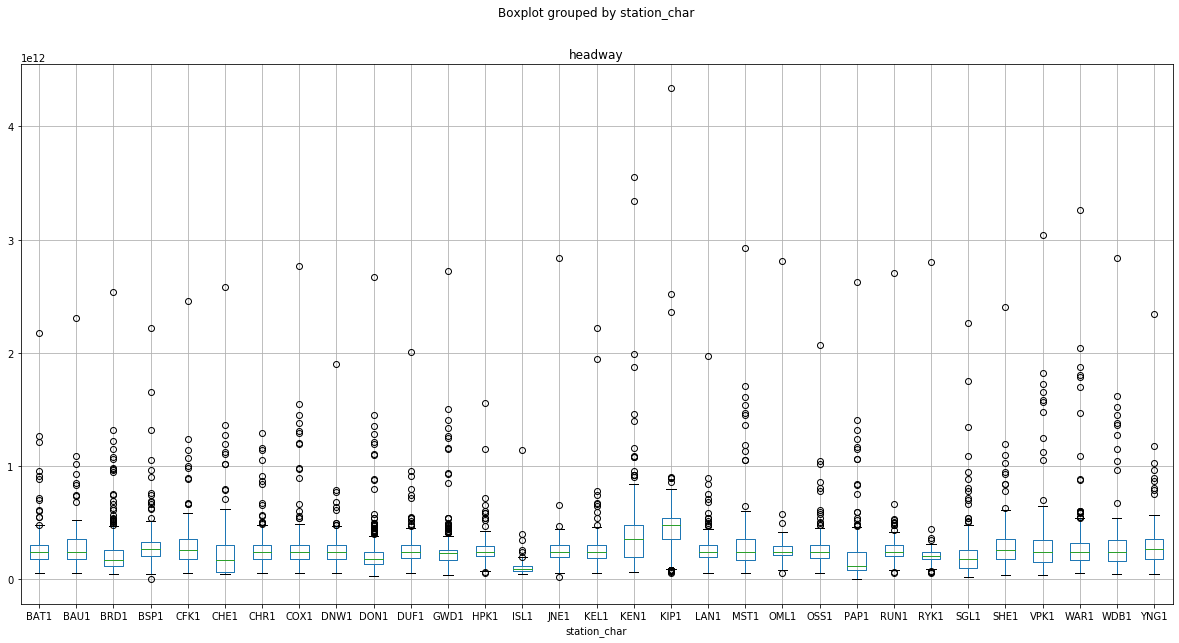

In [21]:
ttc_efa = ttc_ef[['station_char','headway']].copy()

ttc_efa.boxplot(column=['headway'],by='station_char')

In [22]:
ttc_efa.groupby('station_char').describe()

headway                                                  \
               count                    mean                     std   
station_char                                                           
BAT1             439  0 days 00:04:28.335153  0 days 00:02:38.346738   
BAU1             179  0 days 00:04:53.147980  0 days 00:03:44.996567   
BRD1             582  0 days 00:03:33.287663  0 days 00:03:07.262052   
BSP1             445  0 days 00:04:48.605984  0 days 00:02:51.551184   
CFK1             175  0 days 00:05:13.171000  0 days 00:04:13.553718   
CHE1             278  0 days 00:03:43.912434  0 days 00:04:13.243149   
CHR1             441  0 days 00:04:24.371108  0 days 00:02:17.455691   
COX1             433  0 days 00:04:25.328212  0 days 00:03:41.607992   
DNW1             440  0 days 00:04:14.762649  0 days 00:02:01.095663   
DON1             429  0 days 00:03:42.657693  0 days 00:03:29.785983   
DUF1             438  0 days 00:04:24.130799  0 days 00:02:13.303642   
GWD1             429  0 days 00:04:08.652057  0 days 00:03:33.244339   
HPK1             442  0 days 00:04:18.131643  0 days 00:01:51.242815   
ISL1             425  0 days 00:01:44.584154  0 days 00:01:04.796597   
JNE1             436  0 days 00:04:16.359754  0 days 00:02:22.687618   
KEL1             436  0 days 00:04:22.640929  0 days 00:02:33.302070   
KEN1             329  0 days 00:06:26.198100  0 days 00:05:41.524318   
KIP1             266  0 days 00:07:52.515477  0 days 00:05:39.422334   
LAN1             438  0 days 00:04:23.481445  0 days 00:02:08.579975   
MST1             438  0 days 00:04:45.080279  0 days 00:04:02.746626   
OML1             433  0 days 00:04:16.622818  0 days 00:02:17.549799   
OSS1             437  0 days 00:04:22.944932  0 days 00:02:21.548495   
PAP1             426  0 days 00:03:09.783674  0 days 00:03:36.858024   
RUN1             439  0 days 00:04:19.652187  0 days 00:02:19.280324   
RYK1             437  0 days 00:03:33.212924  0 days 00:02:12.174102   
SGL1             681  0 days 00:03:22.089516  0 days 00:02:45.542045   
SHE1             176  0 days 00:05:07.614895  0 days 00:04:03.941348   
VPK1             441  0 days 00:04:45.249976  0 days 00:04:14.709674   
WAR1             433  0 days 00:04:43.344950  0 days 00:04:29.320972   
WDB1             441  0 days 00:04:32.950796  0 days 00:03:46.697698   
YNG1             179  0 days 00:05:15.408882  0 days 00:03:50.822928   

                                                              \
                                 min                     25%   
station_char                                                   
BAT1          0 days 00:00:58.503397  0 days 00:03:03.324246   
BAU1          0 days 00:00:56.935898  0 days 00:02:58.906477   
BRD1          0 days 00:00:46.745173  0 days 00:01:57.240790   
BSP1          0 days 00:00:07.517365  0 days 00:03:28.059121   
CFK1          0 days 00:00:54.470494  0 days 00:03:00.683418   
CHE1          0 days 00:00:44.581560  0 days 00:01:01.437527   
CHR1          0 days 00:00:58.515209  0 days 00:03:01.091099   
COX1          0 days 00:00:54.378412  0 days 00:02:55.623344   
DNW1          0 days 00:00:59.776447  0 days 00:03:01.972341   
DON1          0 days 00:00:25.231780  0 days 00:02:12.113780   
DUF1          0 days 00:00:59.700675  0 days 00:03:11.083620   
GWD1          0 days 00:00:40.751024  0 days 00:02:52.617853   
HPK1          0 days 00:00:58.631238  0 days 00:03:25.546162   
ISL1          0 days 00:00:43.487663  0 days 00:01:10.328642   
JNE1          0 days 00:00:21.845762  0 days 00:03:18.730595   
KEL1          0 days 00:00:58.501947  0 days 00:03:10.998964   
KEN1          0 days 00:01:04.305103  0 days 00:03:17.375155   
KIP1          0 days 00:00:58.533255  0 days 00:05:59.058661   
LAN1          0 days 00:00:59.163416  0 days 00:03:15.131326   
MST1          0 days 00:00:54.304980  0 days 00:02:53.100136   
OML1          0 days 00:00:58.567156  0 days 00:03:30.746063   
OSS1          0 days 00:00:5

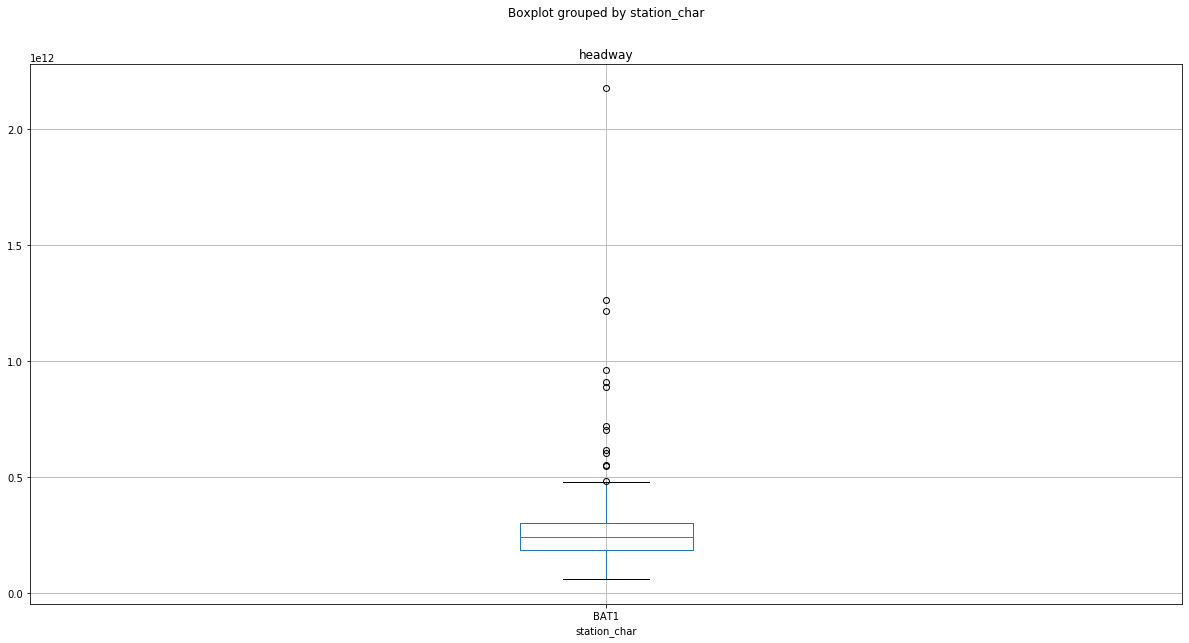

In [23]:
bat1 = ttc_ef.loc[ttc_efa['station_char'] == 'BAT1']
bat1.boxplot(column=['headway'],by='station_char')

Next goal: modelling + predictive analysis